In [7]:
from visualize import visualize_mda_universe # local file

import MDAnalysis as mda 

topology_file = "/home/uni/capstone/2k39_7686d/hpacker-openmm/hpacker-openmm_sidechain_rec.pdb"
trajectory_file = "/home/uni/capstone/2k39_7686d/hpacker-openmm/hpacker-openmm_sidechain_rec.xtc"

u = mda.Universe(topology_file, trajectory_file)
view = visualize_mda_universe(u)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
import rmsd_for_atom_groups as rmsd

rmsd.rmsd_for_atomgroups(u, selection1="backbone", selection2=["protein"])


31


backbone  protein
frame                   
0          0.00     0.00
1          1.76     2.33
2          3.29     3.25
3          3.23     3.02
4          3.47     3.39
5          2.73     2.66
6          3.15     2.89
7          3.08     2.78
8          2.63     2.66
9          2.65     2.71
10         1.54     1.89
11         1.61     2.05
12         3.04     2.91
13         2.82     2.69
14         3.04     3.04
15         2.56     2.65
16         2.58     2.52
17         2.50     2.86
18         1.39     1.82
19         2.21     2.51
20         3.29     3.15
21         2.85     3.51
22         2.52     2.41
23         1.89     2.26
24         3.14     3.07
25         3.20     3.25
26         2.10     2.42
27         2.32     2.26
28         3.63     3.55
29         2.98     2.90
30         2.59     2.63

31


Text(0, 0.5, 'RMSD (Angstrom)')

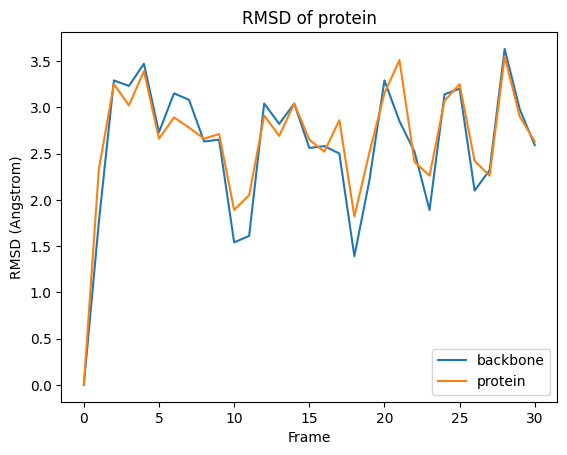

In [9]:
import numpy as np
import pandas as pd
from MDAnalysis.analysis import rms

selection1 = "backbone"
selection2 = ["protein"]

print(len(u.trajectory))
u.trajectory[0]
ref = u
rmsd_analysis = rms.RMSD(u, ref, select=selection1, groupselections=selection2)
rmsd_analysis.run()
columns = [selection1, *selection2] if selection2 else [selection1]
rmsd_df = pd.DataFrame(np.round(rmsd_analysis.rmsd[:, 2:], 2), columns=columns)
rmsd_df.index.name = "Frame"
rmsd_df.head()


import matplotlib.pyplot as plt
rmsd_df.plot(title="RMSD of protein")
plt.ylabel("RMSD (Angstrom)")


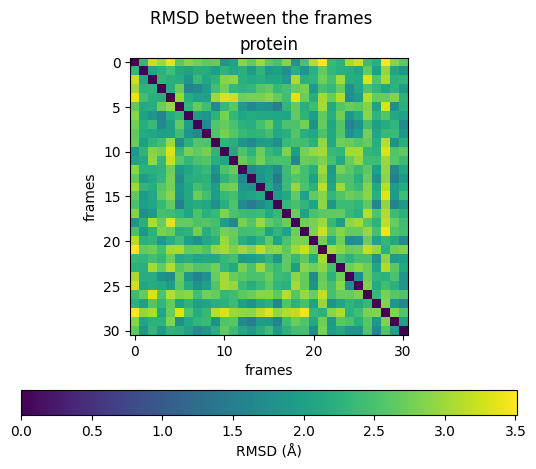

In [10]:
from MDAnalysis.analysis import diffusionmap

pairwise_rmsd = diffusionmap.DistanceMatrix(u, select="protein")
pairwise_rmsd.run()
dist_matrix_protein = pairwise_rmsd.dist_matrix
max_dist = np.amax(dist_matrix_protein)



fig, ax = plt.subplots(1,1)
fig.suptitle("RMSD between the frames")

# protein image
img1 = ax.imshow(dist_matrix_protein, cmap="viridis", vmin=0, vmax=max_dist)
ax.title.set_text("protein")
ax.set_xlabel("frames")
ax.set_ylabel("frames")


fig.colorbar(img1, ax=ax, orientation="horizontal", fraction=0.1, label="RMSD (Å)")

to go:
1) distance maps
2) see if the conformations sampled represent the peptide flip phenomenon in ubiquitin

for distance maps there is a function

In [11]:
protein_residue_id1 = "53"
protein_residue_id2 = "24"
view = visualize_mda_universe(u, output_dir='bioemu-samples-2-residues', sel_string=f"resid {protein_residue_id1} or (resid {protein_residue_id2})",
                              style= {'stick': {}})
view.show()



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

1 1
The distance between residues 53 and 24 is 9.15 Å


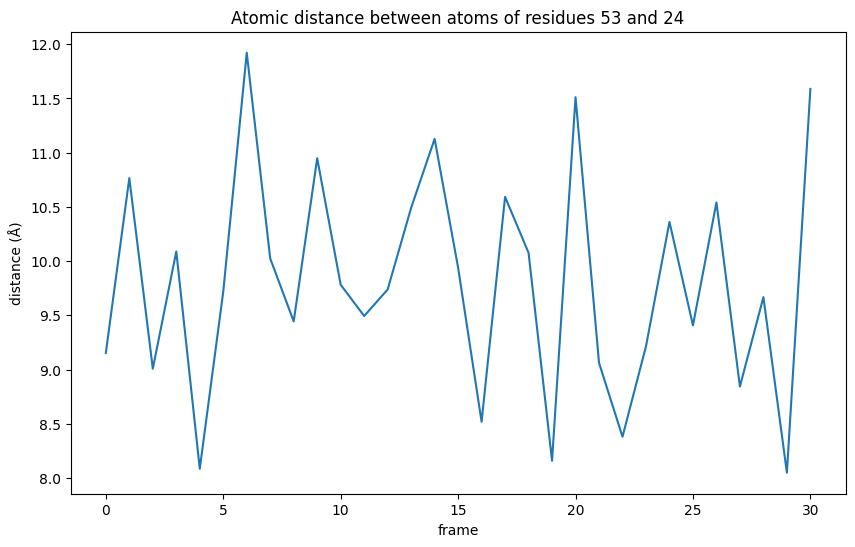

In [ ]:

# --

protein_atom_name1 = "N"
protein_atom_name2 = "OD1" # was OE1, changed to OD1 to match count of atoms

# --

atomgroup_protein1 = u.select_atoms(
    f"resid {protein_residue_id1} and name {protein_atom_name1}")
atomgroup_protein2 = u.select_atoms(
    f"resid {protein_residue_id2} and name {protein_atom_name2}")

# --

from MDAnalysis.analysis.distances import dist

print(atomgroup_protein1.n_atoms, atomgroup_protein2.n_atoms)
distance = dist(atomgroup_protein1, atomgroup_protein2)
print(
    f"The distance between residues {protein_residue_id1} and {protein_residue_id2} is {distance[2][0]:.2f} Å"
)


# --

distances = []
for _ in u.trajectory:
    distance = dist(atomgroup_protein1, atomgroup_protein2)
    distances.append(distance[2][0])

# --

plt.figure(figsize=(10, 6))
plt.plot(distances)
#plt.gca().set_ylim(bottom=0)
plt.ylabel("distance (Å)")
plt.xlabel("frame")
plt.title(f"Atomic distance between atoms of residues {protein_residue_id1} and {protein_residue_id2}")
plt.show()

In [25]:
# writing out a frame to a file
# here the frame with the minimum distance is selected
print("Minimum distance:", min(distances))
print("Frame with minimum distance (counting from 0):", distances.index(min(distances)))
print(distances.index(min(distances)))
frame_index = distances.index(min(distances))
u.trajectory[frame_index]  
selected_atoms = u.select_atoms("all")  
with mda.Writer("bioemu-colabfold-frame-30.pdb", selected_atoms.n_atoms) as writer:
    writer.write(selected_atoms)
print("Frame written to bioemu-colabfold-frame-30.pdb")

Minimum distance: 8.048354438200592
Frame with minimum distance (counting from 0): 29
29
Frame written to bioemu-colabfold-frame-30.pdb
